# Star Trek Script Data Analysis
## Table of contents

* [Introduction](#Introduction)
* [Preliminary dataset processing](#Preliminary-dataset-processing)
* [Initial analysis](#Initial-analysis)
* [Getting counts of character lines](#Getting-counts-of-character-lines)
    * [Creating a character line count DataFrame](#Creating-a-character-line-count-DataFrame)
    * [Plotting character distributions](#Plotting-character-distributions)
    * [Calculating character uniqueness by series](#Calculating-character-uniqueness-by-series)
* [Analysis of *Star Trek* species](#Analysis-of-Star-Trek-species)
    * [The overall most mentioned species](#The-overall-most-mentioned-species)
    * [The most mentioned species by series](#The-most-mentioned-species-by-series)
    * [Plotting species distributions by series](#Plotting-species-distributions-by-series)
* [Future possibilities](#Future-possibilities)

# Introduction

In this project, I perform some exploratory data analysis on a dataset of several hundred *Star Trek* television scripts. As a big fan of the franchise myself, this was a great way to practice my scientific Python skills while obtaining some cool insights into the *Star Trek* universe. 

I gratefully use the dataset made available via Kaggle (https://www.kaggle.com/gjbroughton/start-trek-scripts). The dataset is in JSON format and includes the complete scripts for every *Star Trek* TV series from *Star Trek: The Original Series* (1966) through *Star Trek: Enterprise* (2001). The series are abbreviated: TOS, TAS, TNG, DS9, VOY, and ENT (*The Original Series*, *The Animated Series*, *The Next Generation*, *Deep Space Nine*, *Voyager*, and *Enterprise*, respectively), and I will regularly refer to them as such in this project.

Let's get to it!

# Preliminary dataset processing
First let's convert the JSON dataset to a Pandas DataFrame to make working with the scripts easier:

In [1]:
# Preliminary dataset processing
import pandas as pd

# Read the dataset from JSON format and store as Pandas DataFrame
try:
    scripts = pd.read_json('all_scripts_raw.json')
except ValueError as e:
    print("ValueError:", e)

# Initial analysis
Next, we'll perform some initial analysis on the DataFrame. Let's take a look at a general overview of each series' set of scripts:

In [2]:
# Basic analysis on the lengths of scripts of each series:

for i in scripts.columns:
    print('Description of ' + i + ' Scripts:')
    print()
    print(scripts[i].str.len().describe())
    print()

Description of DS9 Scripts:

count      173.000000
mean     31595.375723
std       4880.074812
min      24219.000000
25%      29086.000000
50%      30980.000000
75%      33024.000000
max      68672.000000
Name: DS9, dtype: float64

Description of TOS Scripts:

count       80.000000
mean     32425.537500
std       3890.282011
min      23826.000000
25%      29633.000000
50%      32693.500000
75%      35274.750000
max      40775.000000
Name: TOS, dtype: float64

Description of TAS Scripts:

count       22.000000
mean     18490.863636
std       1970.823934
min      14500.000000
25%      17180.250000
50%      18913.500000
75%      20336.250000
max      21377.000000
Name: TAS, dtype: float64

Description of TNG Scripts:

count      176.000000
mean     30701.147727
std       4444.867308
min      22032.000000
25%      28992.000000
50%      30276.500000
75%      31982.250000
max      69063.000000
Name: TNG, dtype: float64

Description of VOY Scripts:

count      160.000000
mean     35831.643750

This yields some useful information right away: 
* We see that **TNG has the most episodes among these series** (indicated by a count of 176). 


* **TAS, on the other hand, had the shortest run** -- a cartoon series starring the cast of the original Star Trek, coming out at only 22 episodes. 


* The rest of each description (mean, std, and so on) gives facts about the length of each script (**length is determined by counts of the alphanumeric characters** per script). 


* **VOY comes out with the longest script** across these series, barely passing up TNG. Unsurprisingly, **TAS has the shortest script**, as its episodes ran 30 minutes, versus the standard 45 minute runtime of the live-action series.  
    
Let's move on to take a look at **character distributions** across series!

# Getting counts of character lines
To get an idea of which characters have the most lines in their respective series, we need to extract a character's name any time they have a line in a script. 

Conveniently, each character's name is regularly in an ALL CAPS format, followed immediately by a colon (:).

That makes creating a list of speaking characters pretty straightforward.

I chose to use RegEx to create a function to do just that:

In [3]:
# Use RegEx and a function to extract each character's name, representing that character speaking a line in the episode
import re

def char_extract(series, ep):
    '''Takes a ST series and episode number as arguments
       and returns a list of character names for the specified series/ep'''
    
    #Using a Regular Expression to capture the format of these names, which are ALL CAPS followed by a colon (:), e.g. 'PICARD:'
    chars = re.findall('[A-Z]+\'[A-Z]+:|[A-Z]+:', scripts[series][ep])

    # Strip the colons out and append the results to a list
    chars_clean = []

    for i in chars:
        chars_clean.append((i.strip(':')))
    
    return chars_clean


Just to demonstrate what kind of a list is returned by this function, let's take a look at the first 10 items for the first episode of DS9:

In [4]:
char_extract('DS9', 0)[:10]

['CAPTAIN',
 'OFFICER',
 'SISKO',
 'OFFICER',
 'CAPTAIN',
 'TACTICAL',
 'OFFICER',
 'SISKO',
 'CAPTAIN',
 'SISKO']

The resulting lists returned by the `char_extract` function are quite long, as it contains every occurrence of each character each time they speak a line in the specified series/episode. We'll deal with that shortly.

Before we do that, let's move on by getting a list of how many lines each character has per script. We do that by feeding the `line_count` function the output of the `char_extract` function:

In [5]:
def line_count(chars_clean):
    '''Takes clean character names (i.e. char_extract(series,ep)) as argument
       and returns a corresponding list with the total counts of lines per character'''
    
    char_counts = []

    for i in chars_clean:
        char_counts.append(chars_clean.count(i))
        
    return char_counts

The list returned by `line_count` corresponds to the list returned by `char_extract`. Take a look at these two lists side-by-side:

In [6]:
print('The first 10 lines of the first episode of DS9 are spoken, in order, by: ')
print()
print(char_extract('DS9', 0) [:10])
print()
print('The total number of lines spoken througout the entire episode by each of the previously displayed characters is: ')
print()
print(line_count(char_extract('DS9',0))[:10])

The first 10 lines of the first episode of DS9 are spoken, in order, by: 

['CAPTAIN', 'OFFICER', 'SISKO', 'OFFICER', 'CAPTAIN', 'TACTICAL', 'OFFICER', 'SISKO', 'CAPTAIN', 'SISKO']

The total number of lines spoken througout the entire episode by each of the previously displayed characters is: 

[4, 5, 186, 5, 4, 15, 5, 186, 4, 186]


Admittedly, there is probably a much more efficient way of getting these results, but I choose to create a function `dict_maker` to create a dictionary containing the two lists returned by `char_extract` and `line_count`. 

I `zip` those lists together, creating the dictionary which contains each unique speaking character's name as key, and their total lines in the given episode as value:

In [7]:
#Create a dictionary using the lists created above

def dict_maker(series, ep):
    '''Takes a ST series and ep as argument, returns a dictionary
        containing each unique speaking character per ep and a count of their total lines in that ep'''

    L1 = char_extract(series, ep)

    L2 = line_count(char_extract(series, ep))

    d = dict(zip(L1,L2))
    
    return d

Again using the first episode of DS9 as an example, the resulting dictionary looks like this:

In [8]:
dict_maker('DS9', 0)

{'CAPTAIN': 4,
 'OFFICER': 5,
 'SISKO': 186,
 'TACTICAL': 15,
 'COMPUTER': 19,
 'ENSIGN': 1,
 'CREWMAN': 3,
 'CREWWOMAN': 2,
 'JAKE': 20,
 "O'BRIEN": 67,
 'MONK': 3,
 'KIRA': 79,
 'NOG': 2,
 'ODO': 17,
 'QUARK': 16,
 'PICARD': 27,
 'OPAKA': 17,
 'JENNIFER': 37,
 'BOSS': 1,
 'GIRL': 2,
 'ALIEN': 2,
 'BASHIR': 17,
 'DAX': 53,
 'LIEUTENANT': 1,
 'MAGGIE': 1,
 'DUKAT': 5,
 'CARDASSIAN': 1,
 'BATSMAN': 3,
 'JASAD': 4}

At a glance, it's easy to see that **the main character of DS9, Sisko, comes out with the most number of lines at 186.**

However, it would be much easier to work with these results if they were sorted and stored in a Pandas DataFrame. 

So let's do that next!

# Creating a character line count DataFrame
This next function, `df_maker`, is a workaround. In order to later iterate properly over the values in the DataFrame that results, I had to turn each value into a single-element list. This is bit a strange, but it ends up working out for my purposes:

In [9]:
def df_maker(series):
    '''Takes a ST series as argument and returns a DataFrame containing every single character
        occurring across the series with their total spoken line counts per ep'''
    df = pd.DataFrame()
    
    # Making each line count value a single-element list in order to be iterable later
    for i in range(len(scripts[series].dropna())):
        dct = {k:[v] for k,v in dict_maker(series, i).items()} 
        df = df.append(dct, ignore_index=True)
    
    return df

Next, the `top_lines` function is used to grab the top 15 characters per series (I define 'top 15' as the top 15 characters who have the most lines across the series).

Although it is no surprise that most of these characters are well-known core characters to each series, and that the captain ranks highest in each series, I think **it's cool that the data speaks for itself in the ranking of these characters.** Captains tend to get the most lines, followed by the characters who are next in command, and so on:

In [10]:
# This function takes a DataFrame (from df_maker(series)) as argument and returns a PD series
# That PD series is a collection of the top 15 characters and their total line counts

def top_lines(df):

    chars = []
    lines = []

    for i in df.columns:
        chars.append(i)
        lines.append(sum(df[i].dropna().sum()))
        
    total_lines_dict = {'character': chars, 'total lines': lines}
    
    total_lines_df = pd.DataFrame(total_lines_dict)

    return total_lines_df.sort_values(by=['total lines'],ascending=False).head(15)

Putting the `top_lines` function to use, we can now display nicely formatted DataFrames showing **the characters with the most lines per *Star Trek* series.**

*Note: the index on the left hand side is just the unique indicator for each character. That number actually corresponds to how early into the series they were first introduced, i.e. lower number = introduced earlier*

In [11]:
# Iteratively display DataFrames containing the top 15 characters per series

from IPython.display import display

for i in scripts.columns:
    print('Characters with the most lines in ' + i + ':')
    display(top_lines(df_maker(i)))
    print()

Characters with the most lines in DS9:


,character,total lines
27,SISKO,8490
16,KIRA,5367
1,BASHIR,5074
21,O'BRIEN,4816
22,ODO,4687
26,QUARK,4482
9,DAX,3773
309,WORF,2044
13,JAKE,1485
32,GARAK,1472



Characters with the most lines in TOS:


,character,total lines
22,KIRK,8907
12,SPOCK,4362
23,MCCOY,2490
44,SCOTT,1146
29,SULU,717
30,UHURA,636
194,CHEKOV,446
10,PIKE,214
47,CHAPEL,193
61,MUDD,149



Characters with the most lines in TAS:


,character,total lines
2,KIRK,1306
6,SPOCK,774
4,MCCOY,357
7,SULU,227
5,SCOTT,207
8,UHURA,187
21,CHAPEL,62
18,AREX,61
44,MUDD,50
22,COMPUTER,49



Characters with the most lines in TNG:


,character,total lines
8,PICARD,11982
10,RIKER,7023
3,DATA,6088
5,LAFORGE,4330
17,WORF,3695
15,TROI,3165
2,CRUSHER,3112
16,WESLEY,1372
9,Q,540
1,COMPUTER,529



Characters with the most lines in VOY:


,character,total lines
11,JANEWAY,11252
9,EMH,5626
4,CHAKOTAY,5576
17,PARIS,5094
23,TUVOK,4530
14,KIM,4353
21,TORRES,4236
243,SEVEN,4143
15,NEELIX,3185
13,KES,1334



Characters with the most lines in ENT:


,character,total lines
1,ARCHER,8155
26,TUCKER,4285
23,T'POL,4151
17,REED,2481
16,PHLOX,1893
9,HOSHI,1496
25,TRAVIS,1258
41,SHRAN,393
198,DEGRA,301
20,SOVAL,238


We can now use these DataFrames to produce some graphs to get a different look at character distributions across series!

# Plotting character distributions
From the following graphs we can see something of a more **equal distribution of character screen time** in series like **DS9** and **VOY**, as compared to **TOS**, which largely follows the various exploits of Captain Kirk (for better or worse, I'll let the fans decide).  

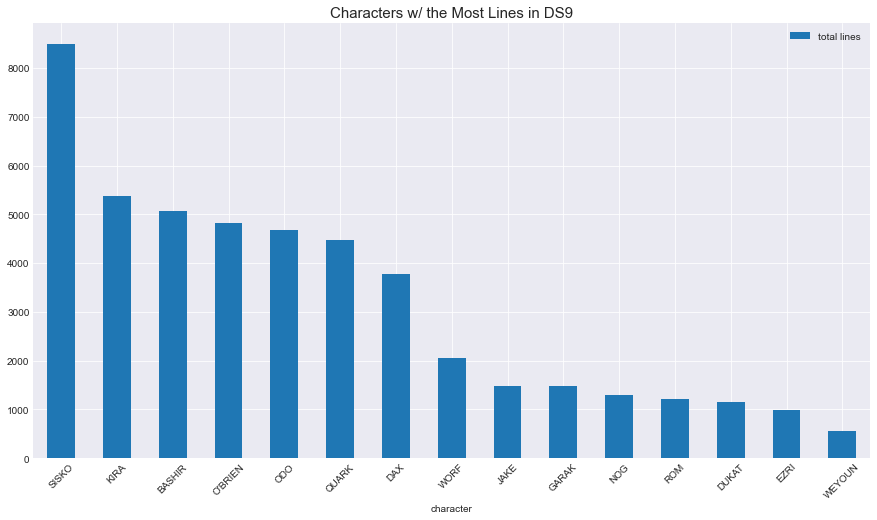

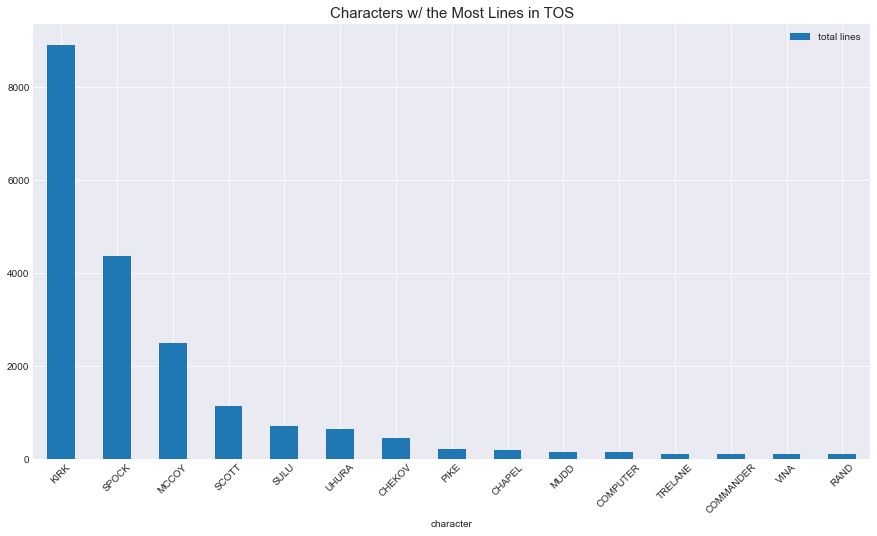

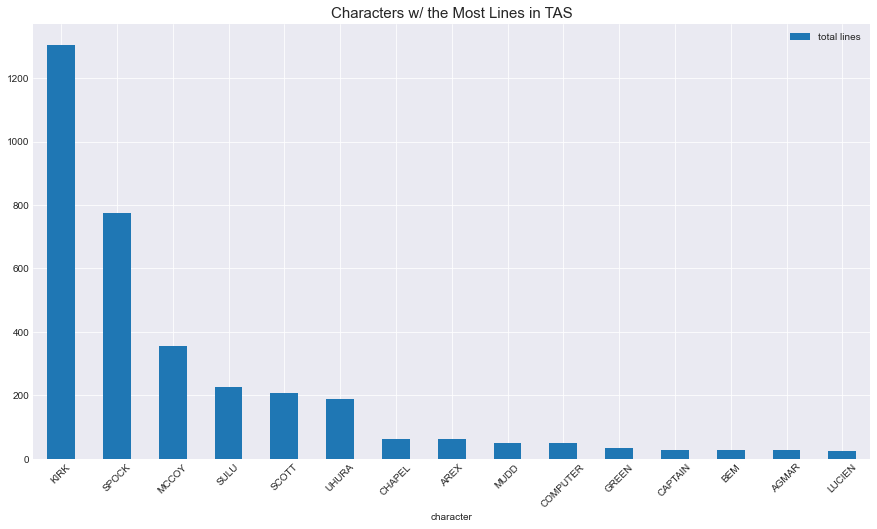

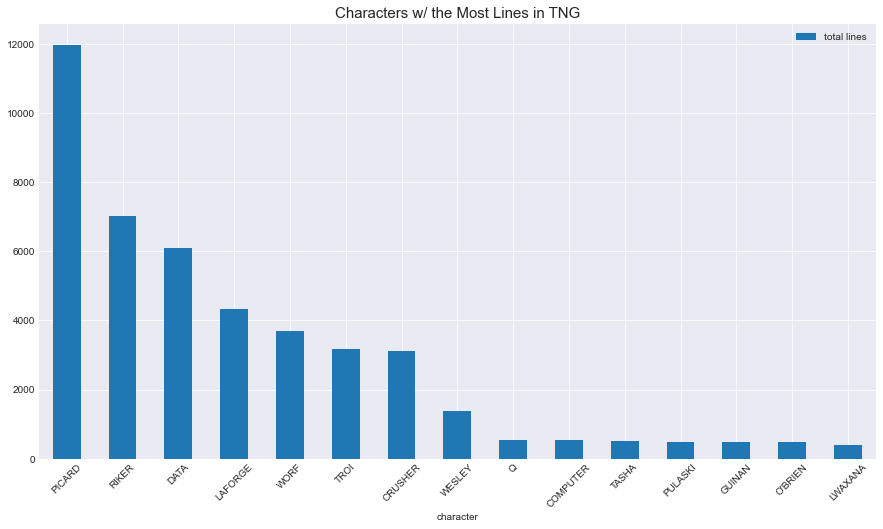

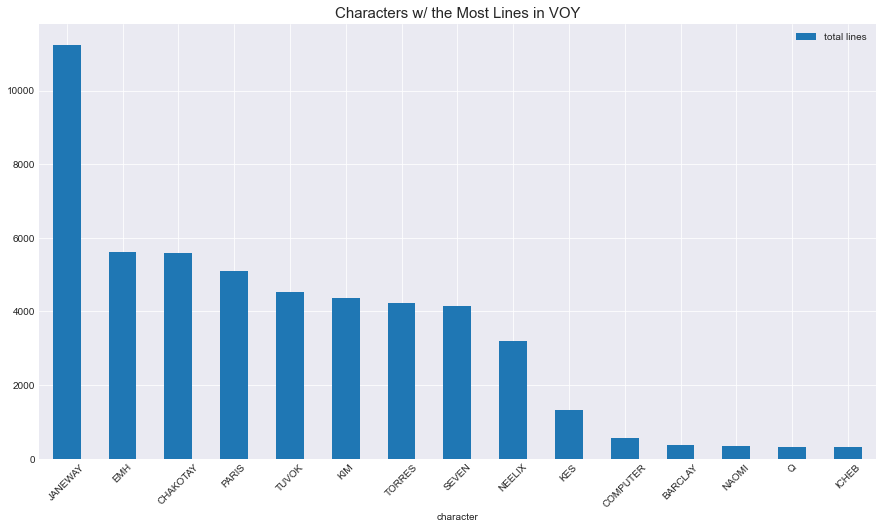

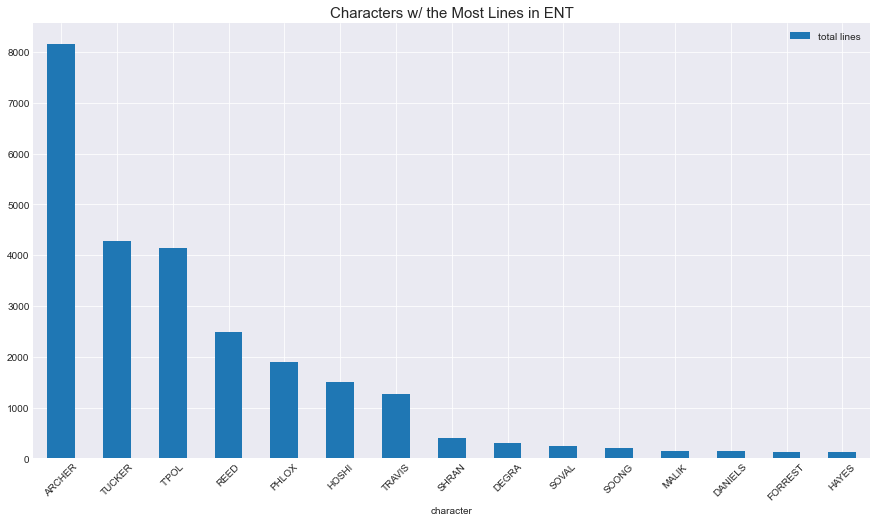

In [12]:
# Display the top 15 characters and their total line counts across the series in bar graph format 

import matplotlib.pyplot as plt
import pandas as pd

for i in scripts.columns:
    plt.style.use('seaborn-darkgrid')
    top_lines(df_maker(i)).plot(kind='bar',x='character',y='total lines',figsize=(15,8))
    plt.title('Characters w/ the Most Lines in ' + i, fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

Next, how about taking a look at **which series have the most unique characters?**

# Calculating character uniqueness by series
I generate a very coarse **'uniqueness' score** that is literally just the number of unique characters in a series divided by the total number of episodes for that series. 

In [13]:
# Creating a list containing unique character counts, episode counts, and 'uniqueness' scores

unique = []

for i in scripts.columns:
    u_chars = len(df_maker(i).columns)
    eps = len(df_maker(i).values)
    uniq = round(u_chars/eps,2)
    unique.append([i, u_chars, uniq])    

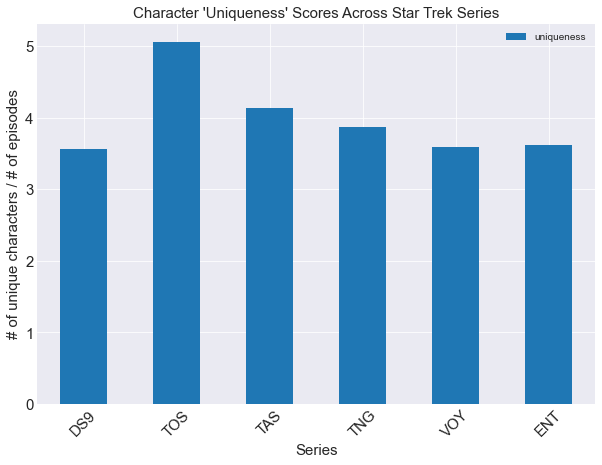

In [14]:
# Plot the 'uniqueness' scores across series

uniq_df = pd.DataFrame(unique)

uniq_df.columns = ['series', 'unique characters', 'uniqueness']

plt.style.use('seaborn-darkgrid')
uniq_df.plot(kind='bar',x='series',y='uniqueness',figsize=(10,7))
plt.title('Character \'Uniqueness\' Scores Across Star Trek Series', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Series', fontsize = 15)
plt.ylabel('# of unique characters / # of episodes', fontsize=15)
plt.show()

This basic calculation does provide some interesting insights.

For example, **TOS has the highest 'uniqueness' score (5.06)**, which might suggest that this series relied more on introducing unique characters as an entertainment factor, whereas **TNG, with the highest number of episodes, scores at 3.87.** 

Does this mean that TNG focused more on character development for the core cast of characters, rather than relying on introducing new characters more frequently? 

This is a really speculative conclusion to draw and would definitely need further analysis before making that claim, but it's an interesting hypothesis to test further.

# Analysis of *Star Trek* species
One of the coolest parts of the *Star Trek* franchise is its exploration of a diverse range of characters from different planets, star systems, dimensions, and beyond. 

Why not take a look to see **which species are mentioned the most per series?** Or even, **which species is mentioned the most overall?**

To accomplish this task, I figured it would be easiest (and good practice) to scrape some data from the Wikipedia page containing a list of Star Trek species (https://en.wikipedia.org/wiki/List_of_Star_Trek_races), store that data in a list, and operate on that:

In [15]:
### Scraping the Wikipedia page for to get a list of unique Star Trek species

import requests
from bs4 import BeautifulSoup

# Make a request to the wiki
page = requests.get("https://en.wikipedia.org/wiki/List_of_Star_Trek_races")
soup = BeautifulSoup(page.content, 'html.parser')

# Create a list containing all h3 tags in the page (i.e. the species names, plus some unneded text that will be trimmed)
h3 = []

# Populate the list
for element in soup.select('h3'):
    h3.append(element.text)

# Trim the list to contain only the species names
species = []

# Using good old fashioned Python to extract only the relevant text and append to the list
for i in range(len(h3)):
    if h3[i][0] != '\n':
        species.append(h3[i][0:h3[i].index('[')])

We don't want to forget to leave out a prominent species mentioned throughout the *Star Trek* franchise...

In [16]:
species.append('Human')

The resulting list:

In [17]:
species

['Ferengi',
 'Gorn',
 'Hirogen',
 'Horta',
 "Jem'Hadar",
 'Kazon',
 'Kelpien',
 'Klingon',
 'Kzinti',
 'Ocampa',
 'Organian',
 'Orion',
 'Pakled',
 'Q',
 'Romulan',
 'Reman',
 'Skreea',
 "Son'a",
 'Species 8472',
 'Talaxian',
 'Tellarite',
 'Thasians',
 'Tholian',
 'Tribble',
 'Trill',
 'T-Rogorans',
 'Vidiian',
 'Vorta',
 'Vulcan',
 'Xindi',
 'Human']

*Note: the following counts are not exhaustive, as the list `species` includes only basic singular forms of species names, e.g. 'Klingon', but not 'Klingons'. This analysis could be improved by including plural forms.* 

*Also, the species known as 'Q' was originally included, but I choose to drop it from the list because any instance of an uppercase 'Q' was counted, greatly distorting the results. This could be remedied, but I choose to simplify the process by dropping 'Q' altogether... After all, that's probably something Q would do.*

In [18]:
# Bye, Q
species.remove('Q')

# The overall most mentioned species 
First I get a count of **how many times each species is mentioned in each script of each series**, and store the results in a DataFrame with a multi-level index:

In [19]:
for i in scripts.columns:
    for j in species:
        # Create the multi-level index
        idx = pd.MultiIndex.from_product([scripts.columns,species], names=['Series', 'Species'])
        col = ['Counts']
        # Get a sum of how many times the species is mentioned throughout the series 
        total = scripts[i].str.count(j).sum()
        # Create the DataFrame using list comprehension
        spec_count_df = pd.DataFrame([scripts[i].str.count(j).sum() for i in scripts.columns for j in species], idx, col)

The resulting DataFrame, `spec_count_df`, is rife with 0-values, as several of the species are not mentioned in each series:

In [20]:
spec_count_df

Counts
Series Species          
DS9    Ferengi     514.0
       Gorn          1.0
       Hirogen       0.0
       Horta         1.0
       Jem'Hadar   651.0
...                  ...
ENT    Vidiian       0.0
       Vorta         0.0
       Vulcan      858.0
       Xindi       304.0
       Human        59.0

[180 rows x 1 columns]

We'll end up dropping the rows containing 0-values to facilitate the process of plotting the species mentioned most per series.

But first, we can take a look at **which species are mentioned most overall**, by getting a grand total of mentions for each species across all series:

In [21]:
# Create a dictionary with species names as keys and the total counts of their mentions across all series
spec_tot_counts = {}

# Initialize the values at 0
for i in species:
    spec_tot_counts[i] = 0

In [22]:
# Populate the values of the dictionary by keeping a running total of species mentions 

for i in scripts.columns:
    for j in species:
        spec_tot_counts[j] += spec_count_df.Counts[i][j]

In [23]:
# Use the values acquired to produce a DataFrame with indices 'Species' and 'Counts'
dct = {}

dct['Species'] = species

In [24]:
dct['Counts'] = [spec_tot_counts[i] for i in species]

In [25]:
spec_tot_df = pd.DataFrame(dct)

Here are the results for **the species with the most mentions across every series contained in this dataset:**

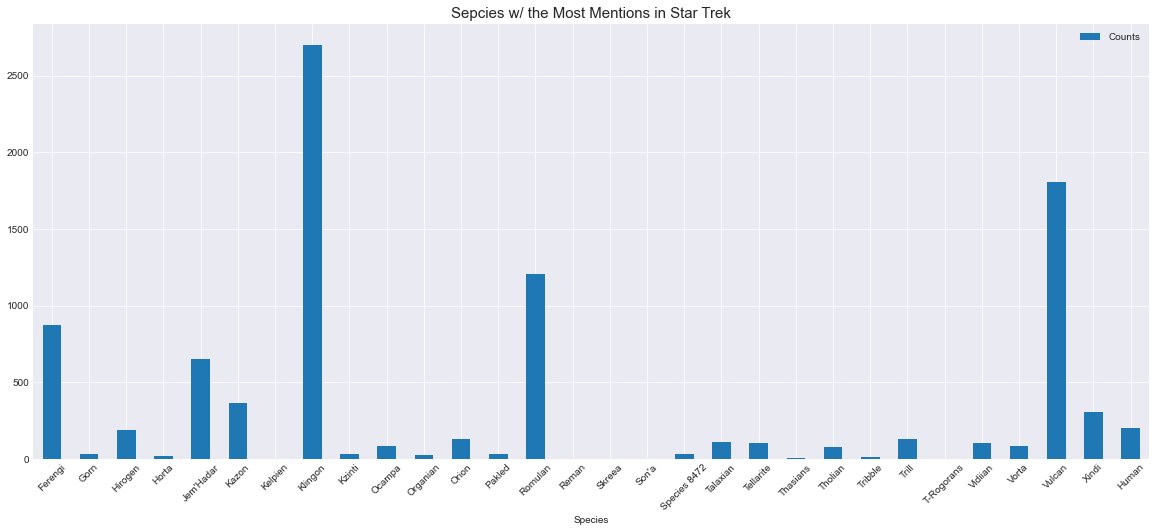

In [26]:
plt.style.use('seaborn-darkgrid')
spec_tot_df.plot(kind='bar',x='Species',y='Counts',figsize=(20,8))
plt.title('Sepcies w/ the Most Mentions in Star Trek', fontsize=15)
plt.xticks(rotation=45)
plt.show()

For most *Star Trek* fans, these results aren't too surprising. The **Klingons reign supreme as the overall most mentioned species across all the *Star Trek* series** in this dataset. The **Vulcans** and **Romulans** also stand out as pillars of *Star Trek* lore. 

# The most mentioned species by series

Now, in order to make plotting the species mentioned on a series-by-series basis a bit easier, I decided to drop the rows containing 0-values as follows:

In [27]:
spec_count_df = spec_count_df.loc[(spec_count_df!=0).any(1)]

Another problem arose after beginning to iteratively plot these values in pie chart format -- the results were rather messy when including species that were mentioned less than 10 times per series.

I chose the easy route and dropped all values less than 10:

In [28]:
spec_count_df = spec_count_df.loc[(spec_count_df>10).any(1)]

The newly truncated result: 

In [29]:
print('Counts of species mentions per series:')
print()
display(spec_count_df)

Counts of species mentions per series:



Counts
Series Species             
DS9    Ferengi        514.0
       Jem'Hadar      651.0
       Klingon       1037.0
       Orion           29.0
       Romulan        277.0
       Tholian         14.0
       Trill          121.0
       Vorta           85.0
       Vulcan         132.0
       Human           30.0
TOS    Gorn            21.0
       Horta           17.0
       Klingon        235.0
       Organian        22.0
       Orion           14.0
       Romulan        127.0
       Tellarite       14.0
       Tholian         23.0
       Vulcan         286.0
       Human           23.0
TAS    Klingon         67.0
       Kzinti          32.0
       Orion           30.0
       Romulan         48.0
       Vulcan          69.0
TNG    Ferengi        268.0
       Klingon        697.0
       Pakled          31.0
       Romulan        629.0
       Vulcan         158.0
       Human           41.0
VOY    Ferengi         90.0
       Hirogen        191.0
       Kazon          365.0
       Klingon        313.0
       Ocampa          85.0
       Romulan         64.0
       Species 8472    34.0
       Talaxian       110.0
       Vidiian        103.0
       Vulcan         302.0
       Human           44.0
ENT    Klingon        353.0
       Orion           51.0
       Romulan         65.0
       Tellarite       84.0
       Tholian         39.0
       Vulcan         858.0
       Xindi          304.0
       Human           59.0

# Plotting species distributions by series
We can now use `spec_count_df` to plot some pie charts to get a better look at the distribution of species mentions per series:

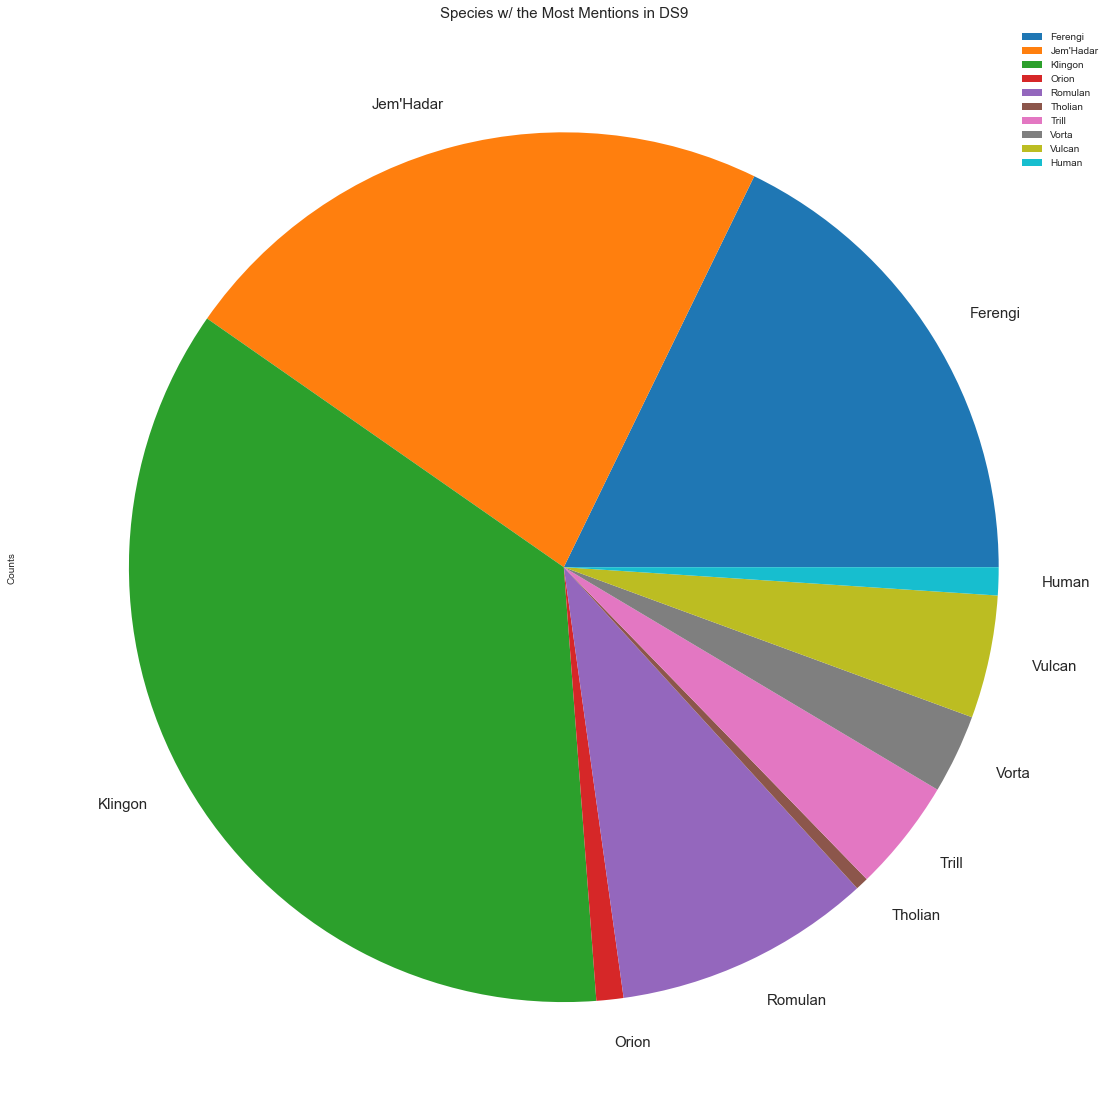

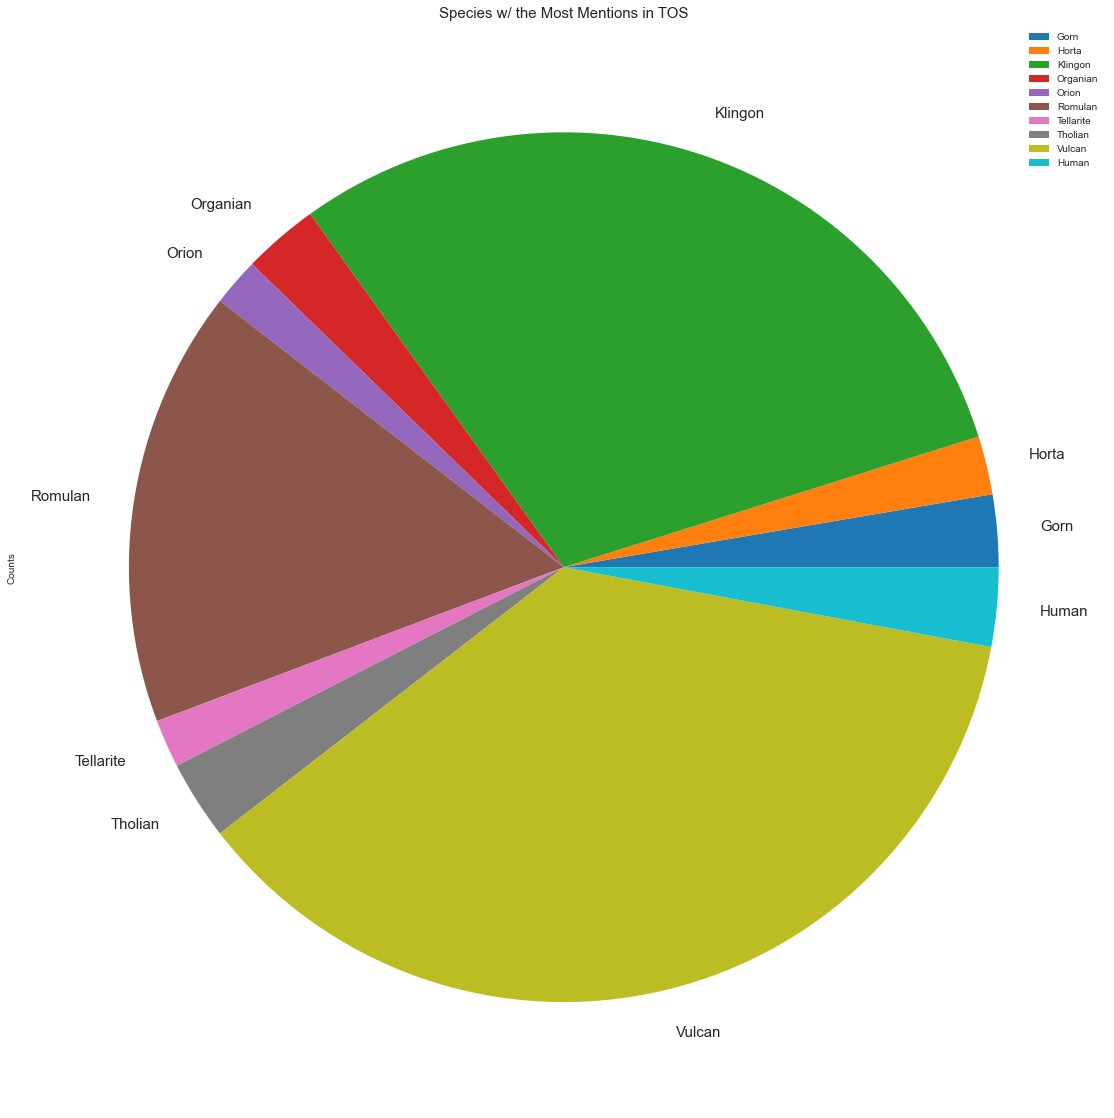

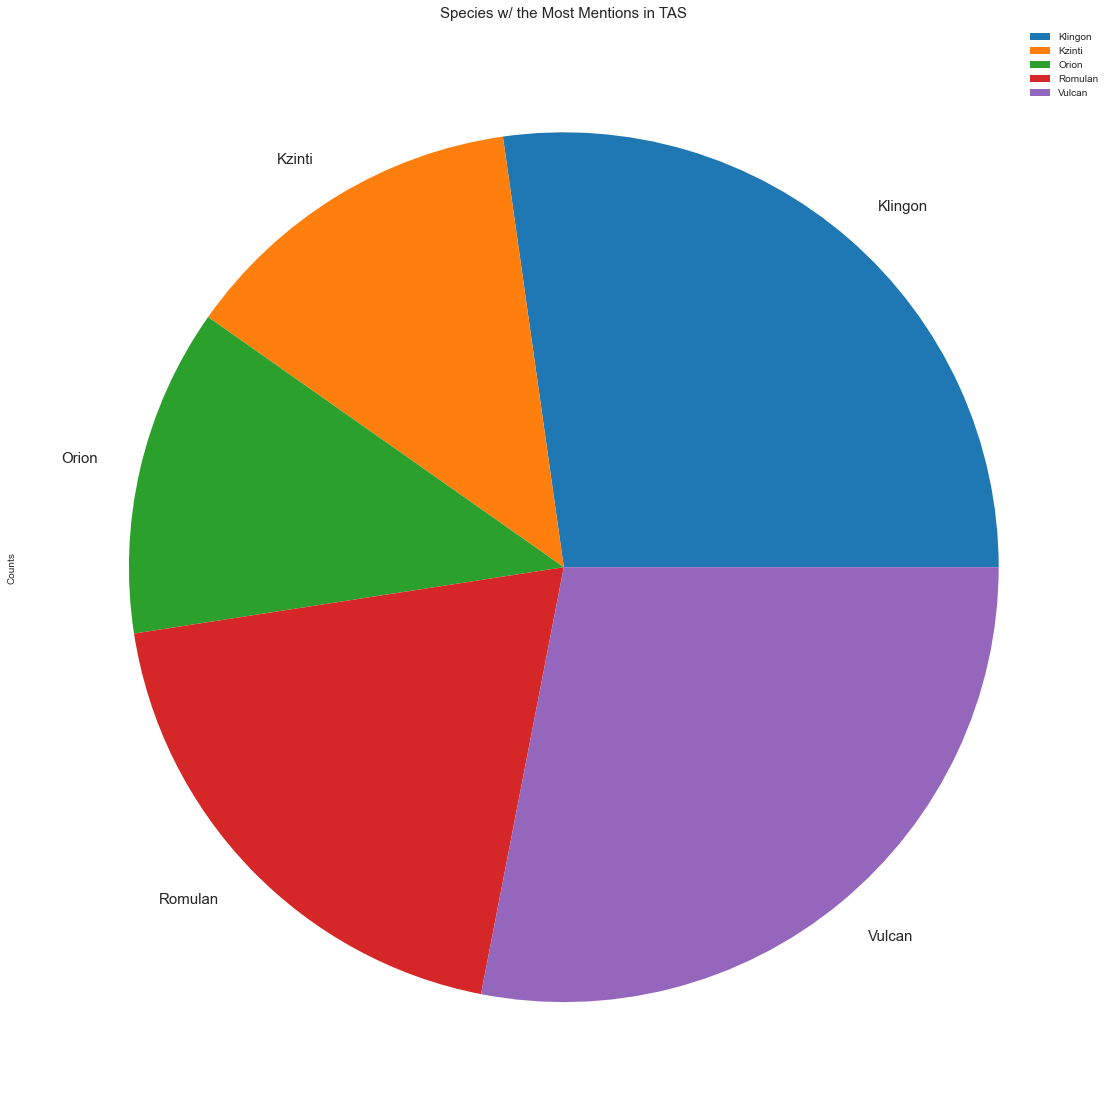

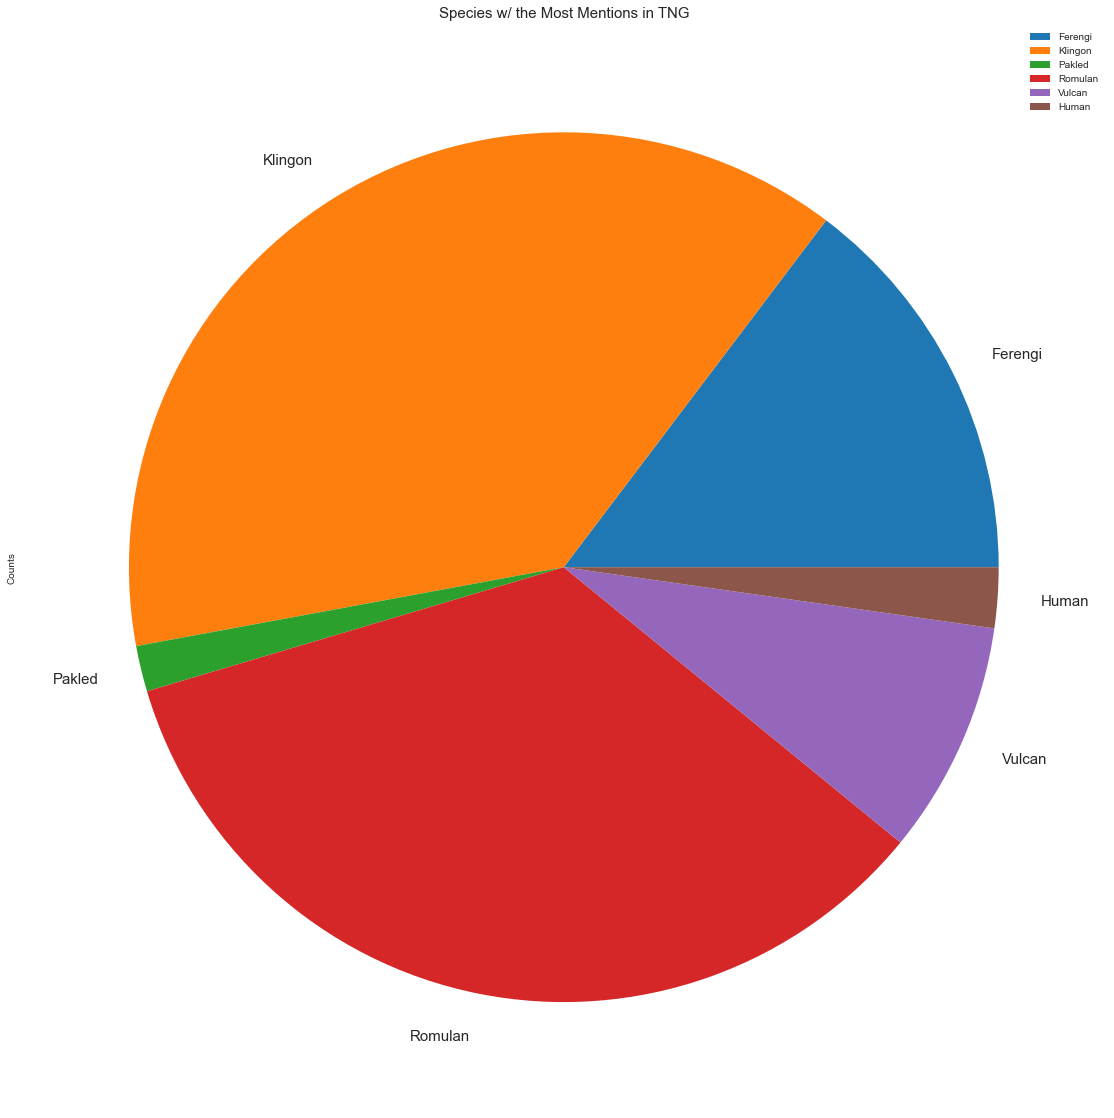

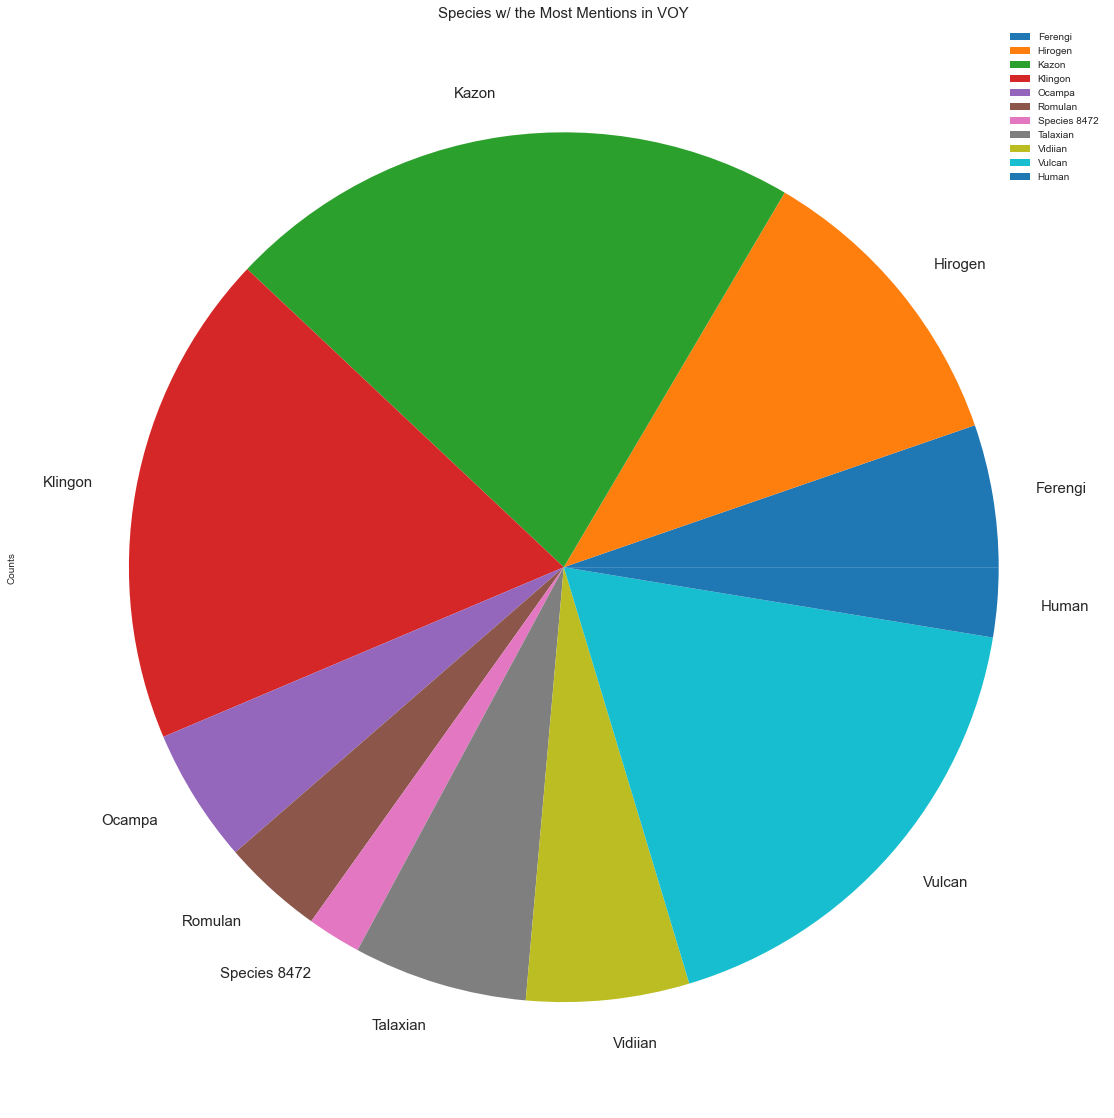

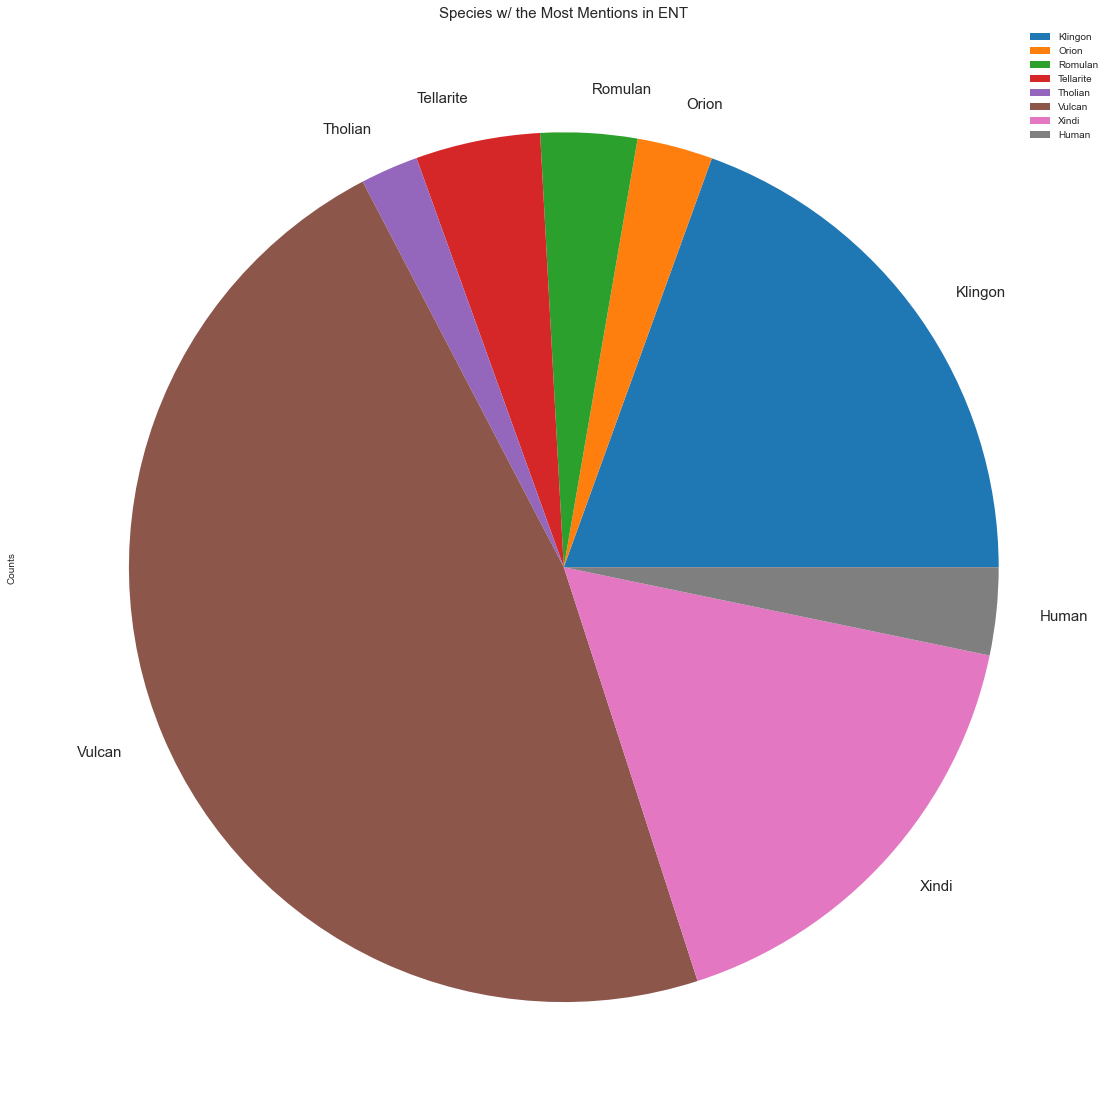

In [30]:
for i in scripts.columns:
    spec_count_df.Counts[i].plot(kind='pie',x='Species',y='Counts',figsize=(20,20),fontsize=15)
    plt.title('Species w/ the Most Mentions in ' + i, fontsize=15)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

Setting aside the reasons why this analysis is not as accurate as is possible (not accounting for plural instances of species, not accounting for lower-case 'human', etc.), the results still do a good job of illustrating how the various species of the *Star Trek* universe are distributed in each series.

# Future possibilities

This was a fun project, and gave me a lot of opportunities to improve my scientific Python skills.

An extended version of this analysis could be implemented, for example, in the context of working with a production team in creating a new *Star Trek* series. By having a birds' eye view of the types of topics, characters, and overall statistics relating to each previous series, it may help the production team make decisions on how to write a new show. 

Some of these methods themselves could be extended to perform general analyses of TV or film scripts (with the appropriate modifications to the code).

While this is a relatively bare-bones analysis, it could be reinforced with more data relating to episode ratings, or even reviews of episodes, in order to get a look at, e.g., which episodes, characters, or series are most popular and why.